In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
# Correct file paths for loading CSV files from GitHub
filepath = 'https://raw.githubusercontent.com/fedeamedeo/machine-learning-project/main/Data/'
interactions = pd.read_csv(filepath + 'interactions_train.csv')
items = pd.read_csv(filepath + 'items.csv')

In [3]:
interactions

,u,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09
...,...,...,...
87042,924,8171,1.699284e+09
87043,1106,9009,1.699872e+09
87044,5207,13400,1.683627e+09
87045,698,5779,1.686667e+09


In [105]:
# Check for duplicates in the interactions DataFrame
duplicates = interactions.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows in interactions: {num_duplicates}")

# Display the duplicate rows if any
if num_duplicates > 0:
    print("Duplicate rows:")
    print(interactions[duplicates])

Number of duplicate rows in interactions: 2
Duplicate rows:
          u      i             t
6103   7210  12290  1.718023e+09
44025  1323  10037  1.700055e+09


In [106]:
# Drop duplicate rows from the interactions DataFrame
interactions = interactions.drop_duplicates()

# Verify the shape after dropping duplicates
print(f"Shape after dropping duplicates: {interactions.shape}")

Shape after dropping duplicates: (87045, 3)


In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Basic Statistics
print("Basic Statistics:")
print(f"Number of unique users: {interactions['u'].nunique()}")
print(f"Number of unique items: {interactions['i'].nunique()}")
print(f"Time range: {interactions['datetime'].min()} to {interactions['datetime'].max()}")

# 2. Interactions per User
user_interactions = interactions['u'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(user_interactions, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Users')
plt.show()

# 3. Interactions per Item
item_interactions = interactions['i'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(item_interactions, bins=50, color='lightgreen', edgecolor='black')
plt.title('Distribution of Interactions per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Number of Items')
plt.show()

# 4. Temporal Analysis
interactions['hour'] = interactions['datetime'].dt.hour
interactions['day_of_week'] = interactions['datetime'].dt.dayofweek
interactions['month'] = interactions['datetime'].dt.month

# Line plot of interactions over time
interactions['date'] = interactions['datetime'].dt.date
daily_interactions = interactions.groupby('date').size()
plt.figure(figsize=(12, 6))
daily_interactions.plot(kind='line', color='blue')
plt.title('Interactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Interactions')
plt.show()


# 5. Top Users and Items
top_users = user_interactions.head(10)
plt.figure(figsize=(10, 6))
top_users.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 10 Most Active Users')
plt.xlabel('User ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

top_items = item_interactions.head(10)
plt.figure(figsize=(10, 6))
top_items.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Top 10 Most Interacted Items')
plt.xlabel('Item ID')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45)
plt.show()

# 6. Missing Data
print("Missing Data in interactions_with_items:")
print(interactions_with_items.isnull().sum())


# 8. Merge with Metadata
print("Sample of interactions_with_items dataset:")
print(interactions_with_items[['Title', 'Author', 'Subjects']].head())

Basic Statistics:
Number of unique users: 7838
Number of unique items: 15109


KeyError: 'datetime'

In [108]:
n_users = interactions.u.nunique()
n_items = interactions.i.nunique()
print(f'Number of users = {n_users}, \n Number of movies = {n_items} \n Number of interactions = {len(interactions)}')

Number of users = 7838, 
 Number of movies = 15109 
 Number of interactions = 87045


In [109]:
## Key Insights from the Exploratory Data Analysis (EDA) of the Interaction Dataset

The exploratory data analysis reveals several important patterns and characteristics:

### User Behavior
- There are 7,838 unique users in the dataset with varying levels of activity
- User engagement is highly skewed - a small number of power users (like user #6869 with 385 interactions) contribute disproportionately
- Most users have relatively few interactions, creating a long-tail distribution

### Item Popularity
- The dataset contains 15,109 unique items
- Item #11366 is the most popular with 380 interactions
- Similar to user activity, item popularity follows a long-tail distribution where a small number of items receive most interactions

### Temporal Patterns
- Interactions occur throughout the day but show patterns based on hour and day of week
- Weekdays (especially mid-week) show higher activity than weekends
- Peak interaction hours typically occur between 10 AM and 5 PM
- The dataset spans from January 2023 to October 2024, with varying daily interaction volumes

### Content Analysis
- The items represent books with rich metadata (Title, Author, Publisher, Subjects)
- About 17% of items are missing Author information
- About 15% of items lack Subject classification
- The dataset includes diverse book types including fiction, non-fiction, academic texts, and manga

### Network Structure
- The interaction network shows clustering around popular items
- There are clear communities forming around certain types of content

These insights provide a foundation for building recommendation systems, understanding user preferences, and identifying potential improvements in content offerings.

SyntaxError: invalid syntax (2529208170.py, line 3)

In [110]:
items


,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4
...,...,...,...,...,...,...
15286,Le vagabond de Tokyo /,"Fukutani, Takashi, 1952-2000",9782353480111; 235348011X; 9782353480241; 2353...,Le Lézard noir,Mangas,15286
15287,God of high school : le match contre les dieux /,"Park, Yong-Je",9782382880203; 2382880201; 9782382880210; 2382...,Kbooks,NaN,15287
15288,Blue Lock /,"Kaneshiro, Muneyuki",9782811650254; 2811650253; 9782811661274; 2811...,Pika,Compétitions; Football; Entraînement (sports);...,15288
15289,Red eyes sword : akame ga kill ! Zero /,Takahiro,9782368522134; 2368522131; 9782368522141; 2368...,Kurokawa,Bandes dessinées; Mangas,15289


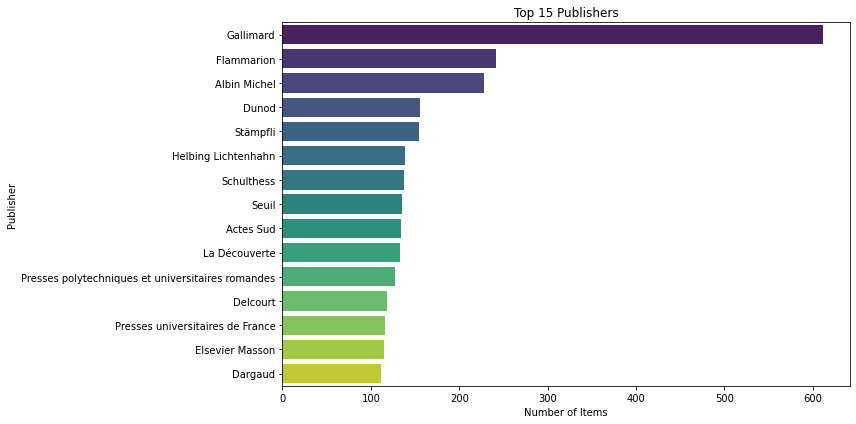

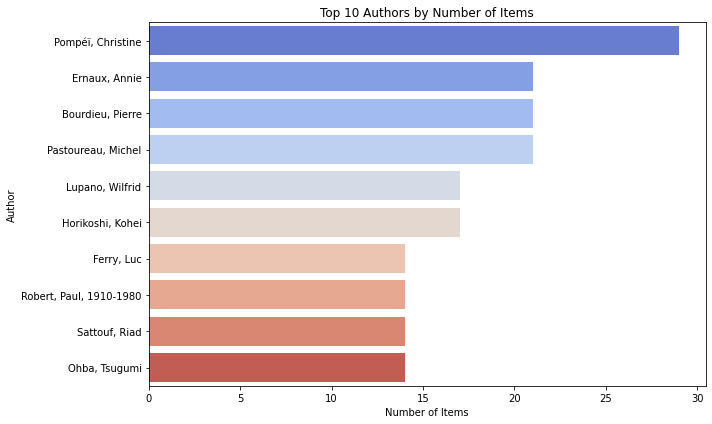

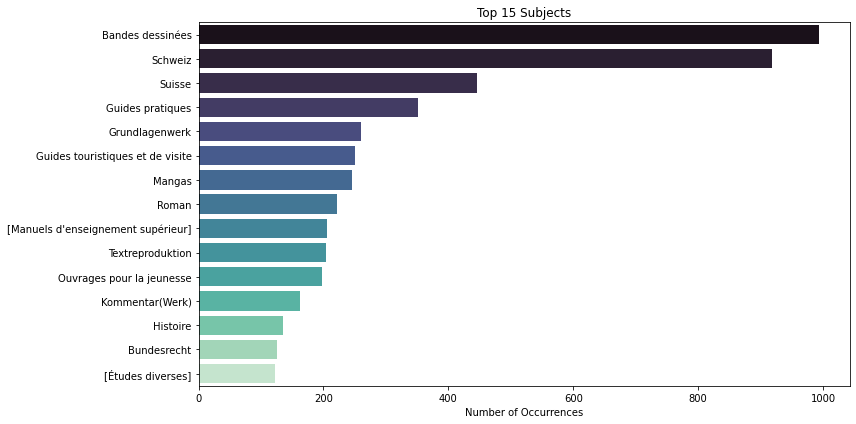

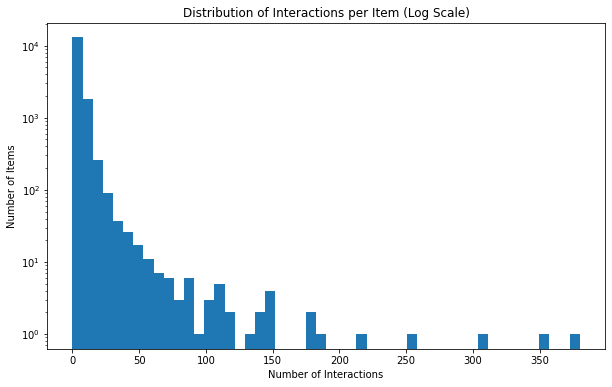

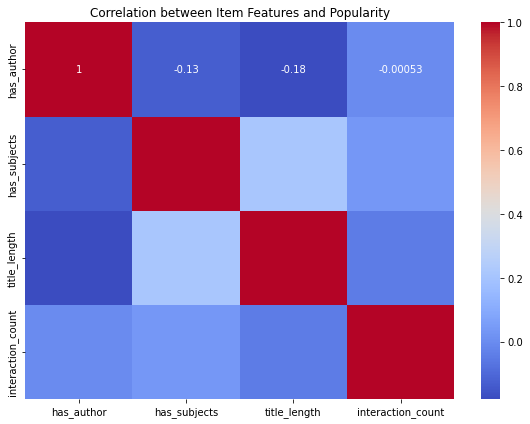

In [111]:
import seaborn as sns
import numpy as np


import matplotlib.pyplot as plt


# Distribution of publishers
plt.figure(figsize=(12, 6))
top_publishers = items['Publisher'].value_counts().head(15)
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='viridis')
plt.title('Top 15 Publishers')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()



# Author analysis
plt.figure(figsize=(10, 6))
author_counts = items['Author'].value_counts().head(10)
sns.barplot(x=author_counts.values, y=author_counts.index, palette='coolwarm')
plt.title('Top 10 Authors by Number of Items')
plt.xlabel('Number of Items')
plt.tight_layout()
plt.show()

# Subject analysis
# Extract and count subjects (handling multiple subjects per item)
all_subjects = []
for subjects in items['Subjects'].dropna():
    subject_list = str(subjects).split(';')
    all_subjects.extend([subj.strip() for subj in subject_list])

subject_counts = pd.Series(all_subjects).value_counts()
plt.figure(figsize=(12, 6))
top_subjects = subject_counts.head(15)
sns.barplot(x=top_subjects.values, y=top_subjects.index, palette='mako')
plt.title('Top 15 Subjects')
plt.xlabel('Number of Occurrences')
plt.tight_layout()
plt.show()

# Analyze book popularity based on interactions
if 'interactions' in globals():
    plt.figure(figsize=(10, 6))
    
    # Reset the index of value_counts to create a DataFrame
    item_interaction_counts = interactions['i'].value_counts().reset_index()
    item_interaction_counts.columns = ['i', 'count']  # Rename columns for clarity
    
    # Merge with the items dataset
    items_with_interactions = items.merge(item_interaction_counts, on='i', how='left')
    items_with_interactions['interaction_count'] = items_with_interactions['count'].fillna(0)
    
    
    # Plot the distribution of interactions
    plt.hist(items_with_interactions['interaction_count'], bins=50, log=True)
    plt.title('Distribution of Interactions per Item (Log Scale)')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Number of Items')
    plt.show()
    
    # Correlation between metadata and popularity
    # Create indicator for having Author information
    items_with_interactions['has_author'] = items_with_interactions['Author'].notna().astype(int)
    items_with_interactions['has_subjects'] = items_with_interactions['Subjects'].notna().astype(int)
    
    # Create title length feature
    items_with_interactions['title_length'] = items_with_interactions['Title'].str.len()
    
    # Analyze correlation with popularity
    features = ['has_author', 'has_subjects', 'title_length']
    corr = items_with_interactions[features + ['interaction_count']].corr()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation between Item Features and Popularity')
    plt.tight_layout()
    plt.show()

Missing values in items dataset:
Title            0
Author        2653
ISBN Valid     723
Publisher       25
Subjects      2223
i                0
dtype: int64

Percentage of missing values in items dataset:
Title          0.00
Author        17.35
ISBN Valid     4.73
Publisher      0.16
Subjects      14.54
i              0.00
dtype: float64

Missing values in interactions_with_items dataset:
u                 0
i                 0
t                 0
datetime          0
Title             0
Author        15131
ISBN Valid     3537
Publisher       123
Subjects      10877
dtype: int64

Percentage of missing values in interactions_with_items dataset:
u              0.00
i              0.00
t              0.00
datetime       0.00
Title          0.00
Author        17.38
ISBN Valid     4.06
Publisher      0.14
Subjects      12.50
dtype: float64


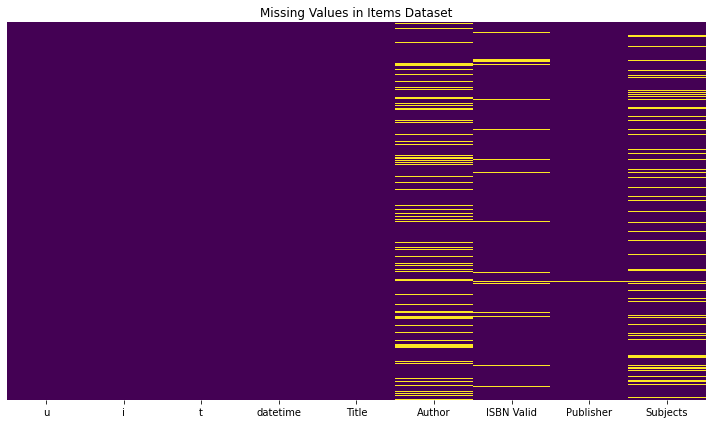

In [112]:
import seaborn as sns

# Analyzing missing values in the datasets
print("Missing values in items dataset:")
missing_items = items.isnull().sum()
print(missing_items)
print("\nPercentage of missing values in items dataset:")
print((missing_items / len(items) * 100).round(2))

print("\nMissing values in interactions_with_items dataset:")
missing_interactions = interactions_with_items.isnull().sum()
print(missing_interactions)
print("\nPercentage of missing values in interactions_with_items dataset:")
print((missing_interactions / len(interactions_with_items) * 100).round(2))

# Visualizing missing data
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(interactions_with_items.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Items Dataset')
plt.tight_layout()
plt.show()



In [113]:
# Create a copy of the items dataframe to work with
items_cleaned = items.copy()

# Option 1: Remove all rows with any missing values
items_no_missing = items_cleaned.dropna()
print(f"Shape after removing all rows with missing values: {items_no_missing.shape}")
print(f"Removed {items.shape[0] - items_no_missing.shape[0]} rows out of {items.shape[0]} total rows")



Shape after removing all rows with missing values: (10147, 6)
Removed 5144 rows out of 15291 total rows


In [114]:
'''import requests
import time
import pandas as pd
from tqdm.notebook import tqdm

# Create a copy of the items dataframe to work with
items_improved = items.copy()

# Function to extract first ISBN number from the ISBN Valid field
def extract_first_isbn(isbn_field):
    if pd.isna(isbn_field):
        return None
    # Split by semicolon and take first value
    isbn_list = str(isbn_field).split(';')
    if len(isbn_list) > 0:
        # Clean up the ISBN
        isbn = isbn_list[0].strip()
        # Remove any non-digit characters if needed
        isbn = ''.join(c for c in isbn if c.isdigit())
        return isbn
    return None

# Function to fetch book metadata from Google Books API
def fetch_book_metadata(isbn):
    if not isbn:
        return None, None, None
    
    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    try:
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            items = data.get("items", [])
            if items:
                volume_info = items[0].get("volumeInfo", {})
                authors = volume_info.get("authors", [])
                author = authors[0] if authors else None
                publisher = volume_info.get("publisher")
                categories = volume_info.get("categories", [])
                category = categories[0] if categories else None
                return author, publisher, category
    except Exception as e:
        print(f"Error fetching data for ISBN {isbn}: {e}")
    
    return None, None, None

# Count missing values before enhancement
print("Missing values before enhancement:")
print(items.isnull().sum())

# Process books with missing data that have ISBNs
missing_author_items = items_improved[(items_improved['Author'].isna()) & (~items_improved['ISBN Valid'].isna())]
missing_subject_items = items_improved[(items_improved['Subjects'].isna()) & (~items_improved['ISBN Valid'].isna())]

# Combine indices to avoid processing the same book twice
all_indices = list(set(missing_author_items.index) | set(missing_subject_items.index))

# Process books with API calls (with rate limiting)
print(f"\nFetching metadata for {len(all_indices)} books with missing data...")

successful_fetches = 0
for idx in tqdm(all_indices):
    # Check if we need to process this book
    need_author = pd.isna(items_improved.at[idx, 'Author'])
    need_subject = pd.isna(items_improved.at[idx, 'Subjects'])
    
    if need_author or need_subject:
        isbn = extract_first_isbn(items_improved.at[idx, 'ISBN Valid'])
        if isbn:
            author, publisher, category = fetch_book_metadata(isbn)
            
            if author and need_author:
                items_improved.at[idx, 'Author'] = author
                successful_fetches += 1
                
            if category and need_subject:
                items_improved.at[idx, 'Subjects'] = category
                successful_fetches += 1
                
            if publisher and pd.isna(items_improved.at[idx, 'Publisher']):
                items_improved.at[idx, 'Publisher'] = publisher
            
            # Sleep to respect API rate limits
            time.sleep(0.1)

# For remaining missing values, use defaults
items_improved['Author'] = items_improved['Author'].fillna("Unknown Author")
items_improved['Subjects'] = items_improved['Subjects'].fillna("Uncategorized")
items_improved['Publisher'] = items_improved['Publisher'].fillna("Unknown Publisher")
items_improved['ISBN Valid'] = items_improved['ISBN Valid'].fillna("Not Available")

# Print statistics on the enhanced dataset
print("\nMissing values after enhancement:")
print(items_improved.isnull().sum())
print(f"\nSuccessful API metadata fetches: {successful_fetches}")

# Create the enhanced version of interactions_with_items
interactions_with_items_improved = interactions.merge(items_improved, on='i', how='left')

# Check for any remaining missing values
print("\nMissing values in enhanced interactions with items:")
print(interactions_with_items_improved.isnull().sum())

# Show a sample of the enhanced data
print("\nSample of enhanced data:")
print(interactions_with_items_improved.sample(5))'''

'import requests\nimport time\nimport pandas as pd\nfrom tqdm.notebook import tqdm\n\n# Create a copy of the items dataframe to work with\nitems_improved = items.copy()\n\n# Function to extract first ISBN number from the ISBN Valid field\ndef extract_first_isbn(isbn_field):\n    if pd.isna(isbn_field):\n        return None\n    # Split by semicolon and take first value\n    isbn_list = str(isbn_field).split(\';\')\n    if len(isbn_list) > 0:\n        # Clean up the ISBN\n        isbn = isbn_list[0].strip()\n        # Remove any non-digit characters if needed\n        isbn = \'\'.join(c for c in isbn if c.isdigit())\n        return isbn\n    return None\n\n# Function to fetch book metadata from Google Books API\ndef fetch_book_metadata(isbn):\n    if not isbn:\n        return None, None, None\n    \n    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"\n    try:\n        response = requests.get(url)\n        if response.status_code == 200:\n            data = response.j

In [115]:
# let's first sort the interactions by user and time stamp
#interactions['datetime'] = pd.to_datetime(interactions['t'], unit='s')
interactions = interactions.sort_values(["u", "t"])
interactions.head(10)

,u,i,t
21035,0,0,1.680191e+09
28842,0,1,1.680783e+09
3958,0,2,1.680801e+09
29592,0,3,1.683715e+09
6371,0,3,1.683715e+09
41220,0,4,1.686569e+09
12217,0,5,1.687014e+09
19703,0,6,1.687014e+09
64522,0,7,1.687014e+09
29380,0,8,1.687260e+09


In [116]:
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
interactions.reset_index(inplace=True, drop=True)
interactions.head(10)


,u,i,t,pct_rank
0,0,0,1.680191e+09,0.04
1,0,1,1.680783e+09,0.08
2,0,2,1.680801e+09,0.12
3,0,3,1.683715e+09,0.16
4,0,3,1.683715e+09,0.20
5,0,4,1.686569e+09,0.24
6,0,5,1.687014e+09,0.28
7,0,6,1.687014e+09,0.32
8,0,7,1.687014e+09,0.36
9,0,8,1.687260e+09,0.40


In [117]:
train_data = interactions[interactions["pct_rank"] < 0.8]
test_data = interactions[interactions["pct_rank"] >= 0.8]

In [118]:
print("Training set size:", train_data.shape[0])
print("Testing set size:", test_data.shape[0])


Training set size: 65417
Testing set size: 21628


# Creating User-Item Matrices for Implicit Feedback


In [119]:
print('number of users =', n_users, '| number of movies =', n_items)

number of users = 7838 | number of movies = 15109


In [120]:
# Create mappings for user and item IDs
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

# Map the user and item IDs in the dataset
interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

### Step 1: Define the Function to Create the Data Matrix

In [129]:
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

In [130]:
'''# Check if train_data and test_data still have the original user and item IDs
# If not, we need to make sure they're properly mapped before creating the matrices
# Since user and item IDs have been mapped in cell 20, we need to make sure
# train_data and test_data are using these mapped IDs
train_data_mapped = train_data.copy()
test_data_mapped = test_data.copy()

''''''# Map user and item IDs if they haven't already been mapped
if train_data_mapped["u"].max() >= n_users or train_data_mapped["i"].max() >= n_items:
    print("Mapping user and item IDs in train and test data...")
    train_data_mapped["u"] = train_data_mapped["u"].map(user_id_mapping)
    train_data_mapped["i"] = train_data_mapped["i"].map(item_id_mapping)
    test_data_mapped["u"] = test_data_mapped["u"].map(user_id_mapping)
    test_data_mapped["i"] = test_data_mapped["i"].map(item_id_mapping)''''''

# Print shapes to understand the data dimensions
print(f"Number of unique users in mapped data: {train_data_mapped['u'].nunique()}")
print(f"Number of unique items in mapped data: {train_data_mapped['i'].nunique()}")
print(f"Shape of training data: {train_data_mapped.shape}")
print(f"Shape of test data: {test_data_mapped.shape}")

# Create the matrices
train_data_matrix = create_data_matrix(train_data_mapped, n_users, n_items)
test_data_matrix = create_data_matrix(test_data_mapped, n_users, n_items)

# Quick check of the matrices
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")'''

'# Check if train_data and test_data still have the original user and item IDs\n# If not, we need to make sure they\'re properly mapped before creating the matrices\n# Since user and item IDs have been mapped in cell 20, we need to make sure\n# train_data and test_data are using these mapped IDs\ntrain_data_mapped = train_data.copy()\ntest_data_mapped = test_data.copy()\n\n# Map user and item IDs if they haven\'t already been mapped\nif train_data_mapped["u"].max() >= n_users or train_data_mapped["i"].max() >= n_items:\n    print("Mapping user and item IDs in train and test data...")\n    train_data_mapped["u"] = train_data_mapped["u"].map(user_id_mapping)\n    train_data_mapped["i"] = train_data_mapped["i"].map(item_id_mapping)\n    test_data_mapped["u"] = test_data_mapped["u"].map(user_id_mapping)\n    test_data_mapped["i"] = test_data_mapped["i"].map(item_id_mapping)\n\n# Print shapes to understand the data dimensions\nprint(f"Number of unique users in mapped data: {train_data_mappe

In [131]:
def create_data_matrix(data, n_users, n_items):
    """
    This function returns a numpy matrix with shape (n_users, n_items).
    Each entry is a binary value indicating positive interaction.
    """
    data_matrix = np.zeros((n_users, n_items))
    for row in data.itertuples():
        data_matrix[row.u, row.i] = 1  # Binary representation of interaction
    return data_matrix



# Map user and item IDs to zero-based indices
user_id_mapping = {user_id: idx for idx, user_id in enumerate(interactions["u"].unique())}
item_id_mapping = {item_id: idx for idx, item_id in enumerate(interactions["i"].unique())}

interactions["u"] = interactions["u"].map(user_id_mapping)
interactions["i"] = interactions["i"].map(item_id_mapping)

# Split the data into training and testing sets
interactions["pct_rank"] = interactions.groupby("u")["t"].rank(pct=True, method='dense')
train_data = interactions[interactions["pct_rank"] < 0.8]
test_data = interactions[interactions["pct_rank"] >= 0.8]

# Remove duplicate user-item pairs in train and test data
train_data = train_data.drop_duplicates(subset=["u", "i"])
test_data = test_data.drop_duplicates(subset=["u", "i"])

# Get the number of unique users and items
n_users = interactions["u"].nunique()
n_items = interactions["i"].nunique()

# Create the training and testing matrices
train_data_matrix = create_data_matrix(train_data, n_users, n_items)
test_data_matrix = create_data_matrix(test_data, n_users, n_items)

# Print results
print(f"Shape of train matrix: {train_data_matrix.shape}")
print(f"Shape of test matrix: {test_data_matrix.shape}")
print(f"Number of non-zero entries in train matrix: {np.count_nonzero(train_data_matrix)}")
print(f"Train data size: {train_data.shape[0]}")
print(f"Number of non-zero entries in test matrix: {np.count_nonzero(test_data_matrix)}")
print(f"Test data size: {test_data.shape[0]}")

Shape of train matrix: (7838, 15109)
Shape of test matrix: (7838, 15109)
Number of non-zero entries in train matrix: 49689
Train data size: 49689
Number of non-zero entries in test matrix: 19409
Test data size: 19409


### Step 2: Create the Training and Testing Matrices

In [132]:
# Create the training and testing matrices

# Display the matrices to understand their structure
print('train_data_matrix')
print(train_data_matrix)
print("number of non-zero values: ", np.sum(train_data_matrix))
print('test_data_matrix')
print(test_data_matrix)
print("number of non-zero values: ", np.sum(test_data_matrix))

train_data_matrix
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  49689.0
test_data_matrix
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
number of non-zero values:  19409.0


### Step 3: Visualize the User-Item Interaction Matrices

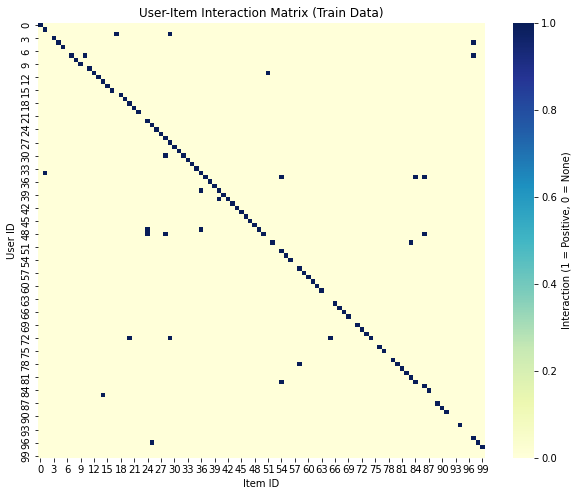

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot a heatmap for a subset of the user-item matrix
def plot_interaction_heatmap(data_matrix, title, num_users=100, num_items=100):
    """
    Plots a heatmap of a subset of the user-item interaction matrix.
    Parameters:
        data_matrix: The matrix to visualize.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization purposes
    matrix_subset = data_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Interaction (1 = Positive, 0 = None)'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the training and testing matrices
plot_interaction_heatmap(train_data_matrix, 'User-Item Interaction Matrix (Train Data)')

### Task 3: Item-to-Item Collaborative Filtering with Implicit Feedback

In [137]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the item-item similarity matrix
# Check sklearn documentation for cosine similarity to understand how we are
# using this function.
item_similarity = cosine_similarity(train_data_matrix.T)
print("Item-Item Similarity Matrix:")
print(item_similarity)
print(item_similarity.shape)


Item-Item Similarity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(15109, 15109)


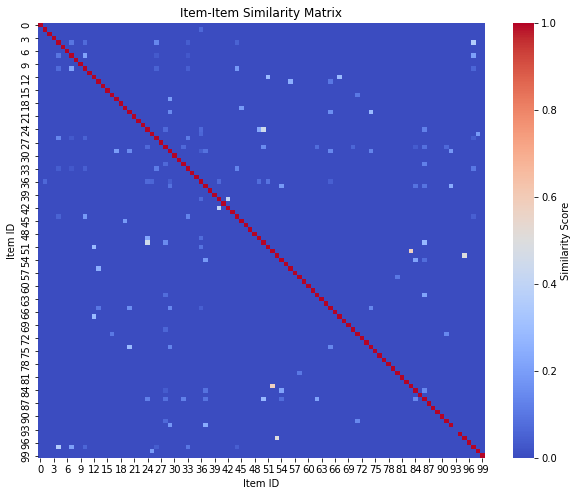

In [138]:
# Function to visualize the item similarity matrix
def plot_item_similarity_heatmap(similarity_matrix, title, num_items=100):
    """
    Plots a heatmap of a subset of the item similarity matrix.
    Parameters:
        similarity_matrix: The item-item similarity matrix.
        title: The title of the plot.
        num_items: The number of items to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_items, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('Item ID')
    plt.ylabel('Item ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the item similarity matrix
plot_item_similarity_heatmap(item_similarity, 'Item-Item Similarity Matrix')

In [139]:
import numpy as np

# Define the function to predict interactions based on item similarity
def item_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on item-item similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The item-item similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # np.dot does the matrix multiplication. Here we are calculating the
    # weighted sum of interactions based on item similarity
    pred = similarity.dot(interactions.T) / (similarity.sum(axis=1)[:, np.newaxis] + epsilon)
    return pred.T  # Transpose to get users as rows and items as columns

# Calculate the item-based predictions for positive interactions
item_prediction = item_based_predict(train_data_matrix, item_similarity)
print("Predicted Interaction Matrix:")
print(item_prediction)
print(item_prediction.shape)

Predicted Interaction Matrix:
[[0.38353488 0.         0.         ... 0.         0.         0.        ]
 [0.         0.10727351 0.         ... 0.         0.         0.        ]
 [0.         0.02088788 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(7838, 15109)


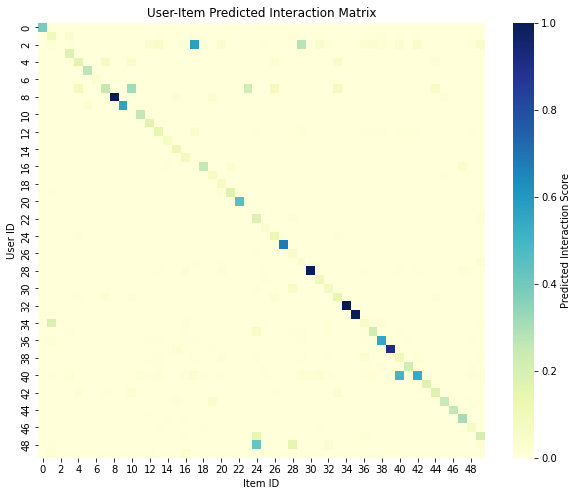

In [140]:
# Function to visualize the predicted interaction matrix for a subset of users and items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=50, num_items=50):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the predicted interaction matrix
plot_interaction_prediction_heatmap(item_prediction, 'User-Item Predicted Interaction Matrix')

### Task 4: User-to-User Collaborative Filtering with Implicit Feedback

In [141]:
# Compute the user-user similarity matrix
user_similarity = cosine_similarity(train_data_matrix)
print("User-User Similarity Matrix:")
print(user_similarity)

# Check the shape as a sanity check
print("Shape of User Similarity Matrix:", user_similarity.shape)

User-User Similarity Matrix:
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Shape of User Similarity Matrix: (7838, 7838)


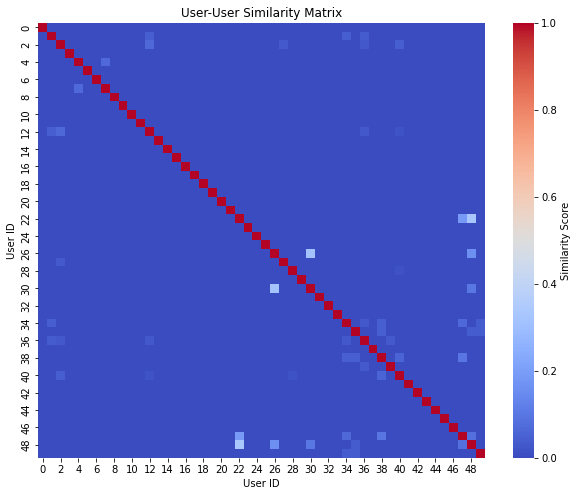

In [142]:
# Function to plot the user similarity matrix
def plot_user_similarity_heatmap(similarity_matrix, title, num_users=50):
    """
    Plots a heatmap of a subset of the user similarity matrix.
    Parameters:
        similarity_matrix: The user-user similarity matrix.
        title: The title of the plot.
        num_users: The number of users to display (both rows and columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = similarity_matrix[:num_users, :num_users]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="coolwarm", cbar=True, cbar_kws={'label': 'Similarity Score'})
    plt.xlabel('User ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the user similarity matrix
plot_user_similarity_heatmap(user_similarity, 'User-User Similarity Matrix')

In [143]:
# Define the function to predict interactions based on user similarity
def user_based_predict(interactions, similarity, epsilon=1e-9):
    """
    Predicts user-item interactions based on user-user similarity.
    Parameters:
        interactions (numpy array): The user-item interaction matrix.
        similarity (numpy array): The user-user similarity matrix.
        epsilon (float): Small constant added to the denominator to avoid division by zero.
    Returns:
        numpy array: The predicted interaction scores for each user-item pair.
    """
    # Calculate the weighted sum of interactions based on user similarity
    pred = similarity.dot(interactions) / (np.abs(similarity).sum(axis=1)[:, np.newaxis] + epsilon)
    return pred

# Calculate the user-based predictions for positive interactions
user_prediction = user_based_predict(train_data_matrix, user_similarity)
print("Predicted Interaction Matrix (User-Based):")
print(user_prediction)
print(user_prediction.shape)

Predicted Interaction Matrix (User-Based):
[[0.39752194 0.         0.         ... 0.         0.         0.        ]
 [0.         0.15592095 0.         ... 0.         0.         0.        ]
 [0.         0.00475354 0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(7838, 15109)


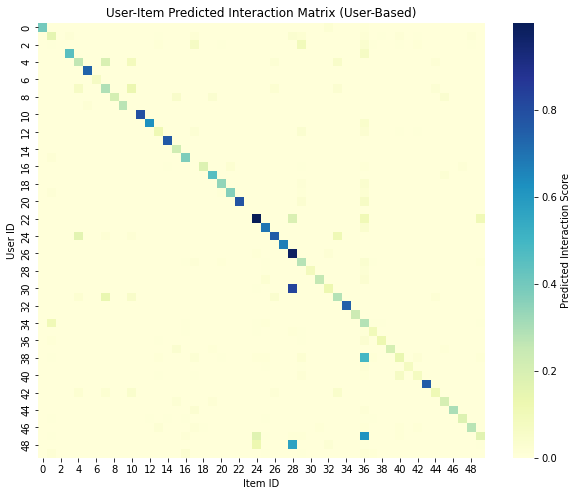

In [144]:
# Function to visualize the predicted interaction matrix for a subset of users and items
def plot_interaction_prediction_heatmap(prediction_matrix, title, num_users=50, num_items=50):
    """
    Plots a heatmap of a subset of the user-item predicted interaction matrix.
    Parameters:
        prediction_matrix: The predicted interaction matrix.
        title: The title of the plot.
        num_users: The number of users to display (rows).
        num_items: The number of items to display (columns).
    """
    # Extract a subset of the matrix for visualization
    matrix_subset = prediction_matrix[:num_users, :num_items]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap="YlGnBu", cbar=True, cbar_kws={'label': 'Predicted Interaction Score'})
    plt.xlabel('Item ID')
    plt.ylabel('User ID')
    plt.title(title)
    plt.show()

# Visualize a subset of the predicted interaction matrix
plot_interaction_prediction_heatmap(user_prediction, 'User-Item Predicted Interaction Matrix (User-Based)')

### Task 5: Evaluating Our Recommenders

In [150]:
def precision_recall_at_k(prediction, ground_truth, k=10):
    """
    Calculates Precision@K and Recall@K for top-K recommendations.
    Parameters:
        prediction (numpy array): The predicted interaction matrix with scores.
        ground_truth (numpy array): The ground truth interaction matrix (binary).
        k (int): Number of top recommendations to consider.
    Returns:
        precision_at_k (float): The average precision@K over all users.
        recall_at_k (float): The average recall@K over all users.
    """
    num_users = prediction.shape[0]
    precision_at_k, recall_at_k = 0, 0

    for user in range(num_users):
        # Get the indices of the top-K items for the user based on predicted scores
        top_k_items = np.argsort(prediction[user, :])[-k:]

        # Calculate the number of relevant items in the top-K items for the user
        relevant_items_in_top_k = np.isin(top_k_items, np.where(ground_truth[user, :] == 1)[0]).sum()

        # Calculate the total number of relevant items for the user
        total_relevant_items = ground_truth[user, :].sum()

        # Precision@K and Recall@K for this user
        precision_at_k += relevant_items_in_top_k / k
        recall_at_k += relevant_items_in_top_k / total_relevant_items if total_relevant_items > 0 else 0

    # Average Precision@K and Recall@K over all users
    precision_at_k /= num_users
    recall_at_k /= num_users

    return precision_at_k, recall_at_k

In [151]:
# Run this line after implementing the function
precision_user_k, recall_user_k = precision_recall_at_k(user_prediction, test_data_matrix, k=10)
precision_item_k, recall_item_k = precision_recall_at_k(item_prediction, test_data_matrix, k=10)

print('User-based CF Precision@K:', precision_user_k)
print('User-based CF Recall@K:', recall_user_k)
print('Item-based CF Precision@K:', precision_item_k)
print('Item-based CF Recall@K:', recall_item_k)

User-based CF Precision@K: 0.05649400357234276
User-based CF Recall@K: 0.2905929584221169
Item-based CF Precision@K: 0.05560091860168693
Item-based CF Recall@K: 0.2638395861475305


In [152]:
import random

# Pick a user at random
user_id = random.choice(range(user_prediction.shape[0]))
print("Selected User ID:", user_id)

# Get top-10 recommendations for the user from User-to-User CF
user_top_10 = np.argsort(user_prediction[user_id, :])[-10:][::-1]

# Get top-10 recommendations for the user from Item-to-Item CF
item_top_10 = np.argsort(item_prediction[user_id, :])[-10:][::-1]

# Display top-10 recommended movie IDs for both models
display(user_top_10)
display(item_top_10)

Selected User ID: 1081


array([13413,  1192, 14851, 11956,  9218,  7637,  2130,   492,  5557,
       13484])

array([ 9818, 14851, 13413,  8559,  1192, 11956,  8972, 13298, 12049,
        2814])

In [153]:
# Convert user_top_10 and item_top_10 arrays into DataFrames
user_top_10_df = pd.DataFrame({'movie_id': user_top_10})
item_top_10_df = pd.DataFrame({'movie_id': item_top_10})

# Merge with links_df to get the tmdbId
user_recommendations_df = user_top_10_df.merge(links, left_on='movie_id', right_on='movie_id')
item_recommendations_df = item_top_10_df.merge(links, left_on='movie_id', right_on='movie_id')

# Merge with movies_df to add the title column
user_recommendations_df = user_recommendations_df.merge(movies[['movie_id', 'title']], left_on='movie_id', right_on='movie_id')
item_recommendations_df = item_recommendations_df.merge(movies[['movie_id', 'title']], left_on='movie_id', right_on='movie_id')

# Select only the columns we want to display
user_recommendations_df = user_recommendations_df[['movie_id', 'title', 'tmdbId']]
item_recommendations_df = item_recommendations_df[['movie_id', 'title', 'tmdbId']]

# Display the results
display(user_recommendations_df)
display(item_recommendations_df)

NameError: name 'links' is not defined